In [ ]:
!pip install pymysql

In [30]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar as c
from warnings import filterwarnings

In [31]:
dbcon = pymysql.connect(host='localhost', user= 'root', password='Poorvi', database='SwiftMarket')

In [32]:
# Load your data into DataFrames
sales = pd.read_sql_query("Select * from Salesdata",con=dbcon,)
customers = pd.read_sql_query("Select * from customers",con=dbcon,)
employees = pd.read_sql_query("Select * from employees",con=dbcon,)
categories = pd.read_sql_query("Select * from categories",con=dbcon,)
subcategories = pd.read_sql_query("Select * from subcategories",con=dbcon,)
suppliers = pd.read_sql_query("Select * from suppliers",con=dbcon,)

C:\Users\Asus\AppData\Local\Temp\ipykernel_17328\1396220176.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales = pd.read_sql_query("Select * from Salesdata",con=dbcon,)
C:\Users\Asus\AppData\Local\Temp\ipykernel_17328\1396220176.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers = pd.read_sql_query("Select * from customers",con=dbcon,)
C:\Users\Asus\AppData\Local\Temp\ipykernel_17328\1396220176.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employees = pd.read_sql_query("Select * from employees",con=d

In [33]:
sales

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.0
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.0
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.0
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.0
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.0
...,...,...,...,...,...,...,...
11996,34996,C-2023-100-163,6019,1060,2023-06-24,1,14047.0
11997,34997,C-2023-100-66,6023,1065,2023-01-03,5,165670.0
11998,34998,C-2023-100-56,6001,1040,2023-02-12,3,28797.0
11999,34999,C-2023-100-174,6020,1098,2023-07-03,1,68360.0


In [34]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SaleID      12001 non-null  int64  
 1   CustomerID  12001 non-null  object 
 2   SubcatID    12001 non-null  int64  
 3   EmployeeID  12001 non-null  int64  
 4   SaleDate    12001 non-null  object 
 5   Quantity    12001 non-null  int64  
 6   TotalPrice  12001 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 656.4+ KB


In [35]:
sales['SaleDate'] = pd.to_datetime(sales['SaleDate'])

In [36]:
sales['order_month'] = sales['SaleDate'].dt.month

In [37]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   SaleID       12001 non-null  int64         
 1   CustomerID   12001 non-null  object        
 2   SubcatID     12001 non-null  int64         
 3   EmployeeID   12001 non-null  int64         
 4   SaleDate     12001 non-null  datetime64[ns]
 5   Quantity     12001 non-null  int64         
 6   TotalPrice   12001 non-null  float64       
 7   order_month  12001 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(1)
memory usage: 703.3+ KB


In [38]:
sales['mon'] = sales['order_month'].apply(lambda i : c.month_name[i])

In [39]:
sales.head()

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice,order_month,mon
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.0,5,May
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.0,12,December
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.0,3,March
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.0,8,August
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.0,3,March


In [29]:
annual_sales = sales.groupby(sales['mon'])['TotalPrice'].sum().reset_index()
annual_sales.columns = ['month', 'monthly_sales']
print(annual_sales)

        month  monthly_sales
0       April    150691604.0
1      August    158477094.0
2    December    137031316.0
3    February    140345189.0
4     January    155340130.0
5        July    149811843.0
6        June    143529379.0
7       March    151612551.0
8         May    163734120.0
9    November    148468105.0
10    October    143488837.0
11  September    146743920.0


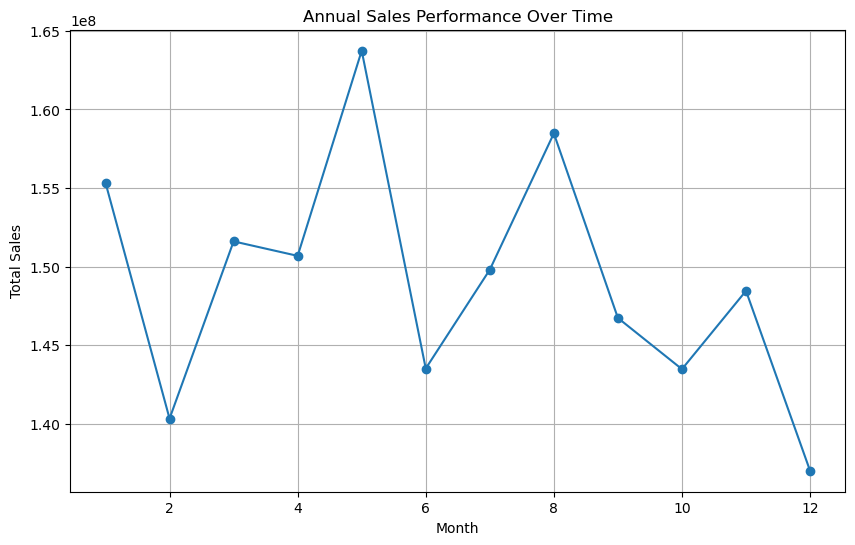

In [23]:
# Plotting the annual sales performance
plt.figure(figsize=(10, 6))
plt.plot(annual_sales['month'], annual_sales['monthly_sales'], marker='o', linestyle='-')
plt.title('Annual Sales Performance Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
#plt.xticks(annual_sales['month'])  # Ensure all years are shown on the x-axis
plt.show()

<h1>Conclusion:</h1>
The graph provides a clear visualization of how total sales have changed on an annual basis. This can help in identifying whether the company is experiencing overall growth, stagnation, or decline. Th maximum sales is done in may month 

In [20]:
sales['order_month'] = sales['SaleDate'].dt.month

In [18]:
sales

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice,order_month
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.0,5
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.0,12
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.0,3
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.0,8
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.0,3
...,...,...,...,...,...,...,...,...
11996,34996,C-2023-100-163,6019,1060,2023-06-24,1,14047.0,6
11997,34997,C-2023-100-66,6023,1065,2023-01-03,5,165670.0,1
11998,34998,C-2023-100-56,6001,1040,2023-02-12,3,28797.0,2
11999,34999,C-2023-100-174,6020,1098,2023-07-03,1,68360.0,7


In [28]:

#monthly_sales = sales.groupby(sales['order_month'])['TotalPrice'].sum().reset_index()
annual_sales['moving_average_sales'] = annual_sales['monthly_sales'].rolling(window=3).mean()
print(annual_sales)

    month  monthly_sales  moving_average_sales
0       1    155340130.0                   NaN
1       2    140345189.0                   NaN
2       3    151612551.0          1.490993e+08
3       4    150691604.0          1.475498e+08
4       5    163734120.0          1.553461e+08
5       6    143529379.0          1.526517e+08
6       7    149811843.0          1.523584e+08
7       8    158477094.0          1.506061e+08
8       9    146743920.0          1.516776e+08
9      10    143488837.0          1.495700e+08
10     11    148468105.0          1.462336e+08
11     12    137031316.0          1.429961e+08


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


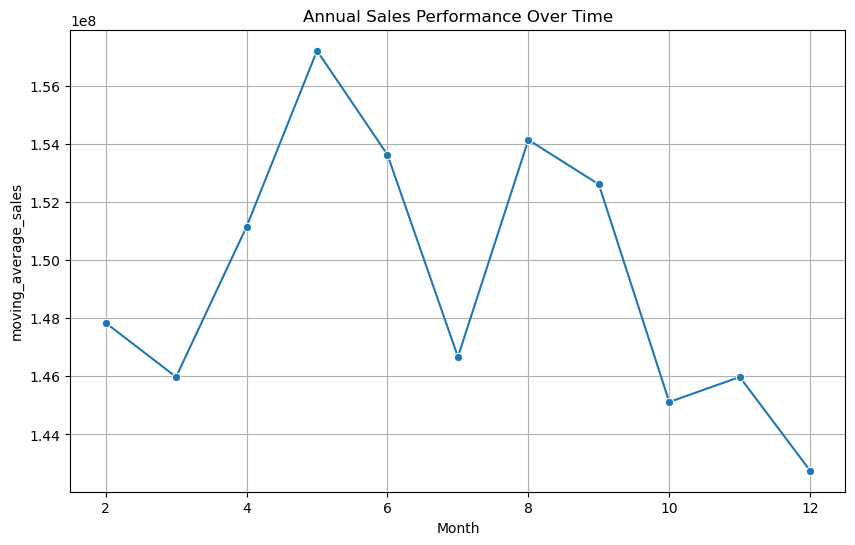

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='order_month',y='moving_average_sales', marker='o', linestyle='-')
plt.title('Annual Sales Performance Over Time')
plt.xlabel('Month')
plt.ylabel('moving_average_sales')
plt.grid(True)
plt.show()

 # Month-Over-Month Growth Rate in Sales

In [20]:
monthly_sales['mom_growth_rate'] = monthly_sales['TotalPrice'].pct_change() * 100
print(monthly_sales)

    order_month   TotalPrice  moving_average_sales  mom_growth_rate
0             1  155340130.0                   NaN              NaN
1             2  140345189.0           147842659.5        -9.652973
2             3  151612551.0           145978870.0         8.028321
3             4  150691604.0           151152077.5        -0.607435
4             5  163734120.0           157212862.0         8.655105
5             6  143529379.0           153631749.5       -12.339970
6             7  149811843.0           146670611.0         4.377128
7             8  158477094.0           154144468.5         5.784089
8             9  146743920.0           152610507.0        -7.403703
9            10  143488837.0           145116378.5        -2.218206
10           11  148468105.0           145978471.0         3.470143
11           12  137031316.0           142749710.5        -7.703196


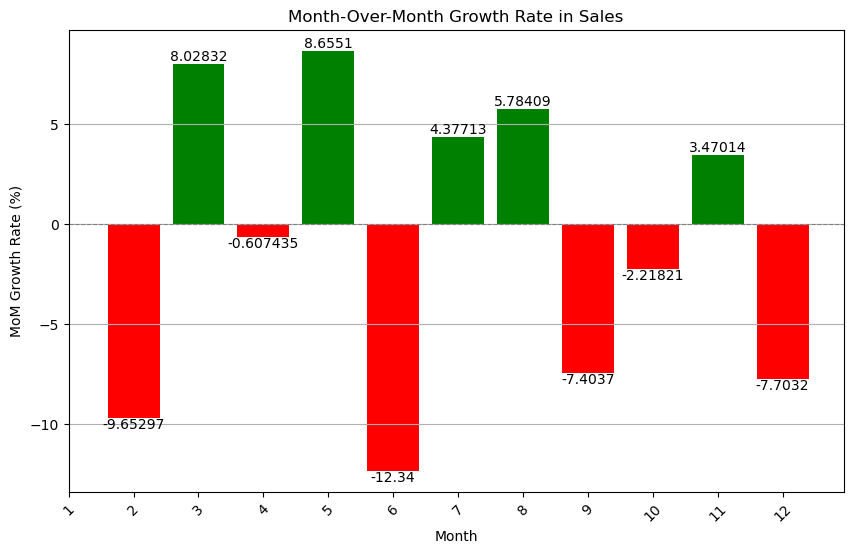

In [156]:
# Plotting the data with different colors for positive and negative growth
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(monthly_sales['order_month'][1:], monthly_sales['mom_growth_rate'][1:], color=['green' if x > 0 else 'red' for x in monthly_sales['mom_growth_rate'][1:]])
for x in ax.containers:
    ax.bar_label(x)
# Adding titles and labels
ax.set_title('Month-Over-Month Growth Rate in Sales')
ax.set_xlabel('Month')
ax.set_ylabel('MoM Growth Rate (%)')

# Adding a grid for better readability
ax.grid(True, axis='y')

# Adding a horizontal line at y=0 to indicate no change
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Formatting x-axis labels for better readability
plt.xticks(monthly_sales['order_month'], rotation=45)

# Display the plot
plt.show()

# Top-Performing Sales Representatives by Total Sales Volume

In [110]:
top_sales_reps = sales.groupby('EmployeeID')['TotalPrice'].sum().reset_index().sort_values(by='TotalPrice', ascending=False)
print(top_sales_reps.head(1))

     EmployeeID  TotalPrice
114        1115  20895341.0


In [111]:
print(top_sales_reps)

     EmployeeID  TotalPrice
114        1115  20895341.0
16         1017  19035834.0
28         1029  18649467.0
73         1074  18333919.0
0          1001  18231579.0
..          ...         ...
4          1005  11565845.0
18         1019  11412116.0
14         1015  11399241.0
71         1072  10898982.0
44         1045  10893657.0

[120 rows x 2 columns]


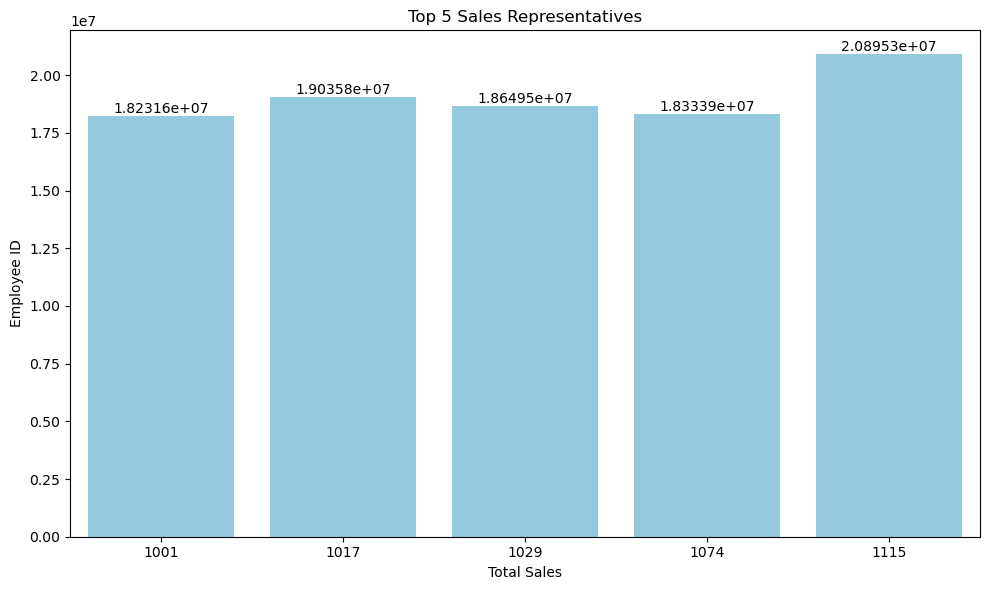

In [173]:
# Plotting the data
plt.subplots(figsize=(10, 6))

# Bar chart
ax=sns.barplot(x=top_sales_reps['EmployeeID'][:5], y=top_sales_reps['TotalPrice'][:5], color='skyblue')

# Adding titles and labels
plt.title('Top 5 Sales Representatives')
plt.xlabel('Total Sales')
plt.ylabel('Employee ID')


# Adding data labels
for i in ax.containers:
    ax.bar_label(i)
    #ax.text(i.get_width() + 5, i.get_y() + 0.5, 
    #       str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

# Display the plot
plt.tight_layout()
plt.show()

# Total Sales Made by Each Employee

In [23]:
employee_sales = sales.groupby('EmployeeID')['TotalPrice'].sum().reset_index().sort_values(by='EmployeeID')
print(employee_sales)

     EmployeeID  TotalPrice
0          1001  18231579.0
1          1002  18042772.0
2          1003  16151819.0
3          1004  13648670.0
4          1005  11565845.0
..          ...         ...
115        1116  17333826.0
116        1117  15910570.0
117        1118  12613265.0
118        1119  16623169.0
119        1120  14229805.0

[120 rows x 2 columns]


# Category with Highest Total Sales

In [26]:
sales

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice,order_month
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.0,5
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.0,12
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.0,3
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.0,8
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.0,3
...,...,...,...,...,...,...,...,...
11996,34996,C-2023-100-163,6019,1060,2023-06-24,1,14047.0,6
11997,34997,C-2023-100-66,6023,1065,2023-01-03,5,165670.0,1
11998,34998,C-2023-100-56,6001,1040,2023-02-12,3,28797.0,2
11999,34999,C-2023-100-174,6020,1098,2023-07-03,1,68360.0,7


In [41]:
categories

,CategoryID,CategoryName
0,500100,Electronics and Gadgets
1,500101,Home and Kitchen Appliances
2,500102,Outdoor and Sports Equipment
3,500103,Health and Wellness Products
4,500104,Books and Educational Materials
5,500105,Pet Supplies and Accessories


In [46]:
df =sales.merge(subcategories, on='SubcatID')
df

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice,SubcatName,CategoryID,UnitPrice,SupplierID
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.0,Laptops,500100,88216.0,3078
1,23040,C-2023-100-106,6002,1069,2023-01-15,1,88216.0,Laptops,500100,88216.0,3078
2,23049,C-2023-100-195,6002,1082,2023-02-09,5,441080.0,Laptops,500100,88216.0,3078
3,23153,C-2023-100-133,6002,1037,2023-02-11,4,352864.0,Laptops,500100,88216.0,3078
4,23243,C-2023-100-181,6002,1080,2023-05-31,3,264648.0,Laptops,500100,88216.0,3078
...,...,...,...,...,...,...,...,...,...,...,...
11996,34723,C-2023-100-9,6009,1088,2023-11-21,3,103392.0,Instant Pot,500101,34464.0,3004
11997,34915,C-2023-100-105,6009,1068,2023-07-13,4,137856.0,Instant Pot,500101,34464.0,3004
11998,34933,C-2023-100-152,6009,1002,2023-06-28,5,172320.0,Instant Pot,500101,34464.0,3004
11999,34981,C-2023-100-150,6009,1052,2023-05-31,5,172320.0,Instant Pot,500101,34464.0,3004


In [106]:
category_sales = df.merge(categories, on='CategoryID').groupby('CategoryName')['TotalPrice'].sum().reset_index().sort_values(by='TotalPrice', ascending=False)
print(category_sales.head(1))

                   CategoryName   TotalPrice
5  Pet Supplies and Accessories  361848986.0


In [107]:
print(category_sales)

                      CategoryName   TotalPrice
5     Pet Supplies and Accessories  361848986.0
2     Health and Wellness Products  324761329.0
1          Electronics and Gadgets  319374417.0
0  Books and Educational Materials  282897933.0
3      Home and Kitchen Appliances  269316684.0
4     Outdoor and Sports Equipment  231074739.0


# Number of Customers in Each State

In [30]:
customers

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur
4,C-2023-100-102,Navya,Dash,NavyaDash_5@zmail.com,+917644200850,70/782\nBahl Road,Kerala
...,...,...,...,...,...,...,...
195,C-2023-100-95,Taran,Din,TaranDin_12@zmail.com,6834976149,H.No. 18\nArora Marg,Karnataka
196,C-2023-100-96,Bhamini,Gara,BhaminiGara_1@zmail.com,+913844979166,H.No. 22\nBrahmbhatt Zila,Chhattisgarh
197,C-2023-100-97,Hunar,Kothari,HunarKothari_13@zmail.com,+910694175434,"84, Madan Chowk",Kerala
198,C-2023-100-98,Riaan,Wali,RiaanWali_11@zmail.com,6570105054,98\nComar Zila,Telangana


In [33]:
customers_per_state = customers.groupby('State')['CustomerID'].count().reset_index()
customers_per_state.columns = ['state', 'number_of_customers']
print(customers_per_state)

                state  number_of_customers
0   Arunachal Pradesh                   11
1               Assam                   10
2               Bihar                   14
3        Chhattisgarh                   10
4               Delhi                    6
5                 Goa                   14
6             Gujarat                   10
7             Haryana                    6
8    Himachal Pradesh                   11
9           Jharkhand                    5
10          Karnataka                   11
11             Kerala                    9
12     Madhya Pradesh                   10
13            Manipur                   14
14          Meghalaya                    8
15            Mizoram                    9
16           Nagaland                   11
17         Tamil Nadu                    7
18          Telangana                    7
19            Tripura                   10
20      Uttar Pradesh                    7


# Average Quantity of Each Product Sold

In [40]:
sales

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.0
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.0
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.0
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.0
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.0
...,...,...,...,...,...,...,...
11996,34996,C-2023-100-163,6019,1060,2023-06-24,1,14047.0
11997,34997,C-2023-100-66,6023,1065,2023-01-03,5,165670.0
11998,34998,C-2023-100-56,6001,1040,2023-02-12,3,28797.0
11999,34999,C-2023-100-174,6020,1098,2023-07-03,1,68360.0


In [42]:
average_quantity_per_product = sales.merge(subcategories, on='SubcatID').groupby('SubcatName')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
print(average_quantity_per_product)

                SubcatName  Quantity
20    Portable power banks      1431
1                  Bicycle      1311
17       Non-fiction books      1285
4             Camping tent      1277
14                 Laptops      1276
18                Pet beds      1272
6         Children's books      1270
21        Resistance bands      1254
10          Fiction novels      1250
23           Running shoes      1235
12             Foam roller      1233
8             Dog/cat food      1230
24             Smartphones      1214
3            Camping stove      1208
15     Leashes and collars      1195
13             Instant Pot      1188
19                Pet toys      1187
0                Air fryer      1184
16      Meditation cushion      1174
7             Coffee maker      1161
22    Robot vacuum cleaner      1154
27     Wireless headphones      1147
9   Essential oil diffuser      1141
28               Workbooks      1137
29                Yoga mat      1136
25            Smartwatches      1134
2

# Supplier with Highest Total Sales

In [55]:
suppliers

,SupplierID,SupplierName,ContactPerson,Email,Phone,Address,State
0,3001,Raja-Yogi,Tejas Magar,kkala@rattan-mallick.com,+914438239269,"H.No. 465, Chadha Nagar\nAmroha 898232",Rajasthan
1,3002,"Sridhar, Sidhu and Maharaj",Trisha Tella,darshitsuri@raj.info,6329450696,"H.No. 56\nBath, Patna-426289",Assam
2,3003,"Sahota, Khurana and Kumar",Veer Rajagopal,chowdhuryazad@sami-choudhary.info,+911453437713,"H.No. 406\nDixit Road, Barasat 755279",Uttarakhand
3,3004,Agate-Kalita,Armaan Mammen,ehsaanbadami@chacko-sethi.com,+911025312767,"96, Banerjee Path\nMalda-102338",Bihar
4,3005,"Suresh, Hans and Borra",Kabir Loyal,tganesan@ramakrishnan.com,08649622797,"66/317, Brar Road\nMaheshtala-954181",Jharkhand
...,...,...,...,...,...,...,...
85,3086,"Bhargava, Khurana and Bobal",Seher Ahluwalia,parinaaz50@gera-baral.com,03154219311,"718, Garg\nAhmednagar-925563",Goa
86,3087,Sagar-Shere,Neelofar Lalla,mishtibhargava@vohra-gandhi.org,+914160643270,"33\nDara Street, Srikakulam-460103",Tripura
87,3088,"Jha, Bhatnagar and Bansal",Armaan Solanki,mallickmishti@dara.com,9087932199,351\nSandal Path\nBuxar 154147,Mizoram
88,3089,Gara-Aurora,Zara Doshi,thakkarmishti@ram.info,2422643646,"364, Verma Path, Ballia 547530",Madhya Pradesh


In [104]:
supplier_sales=df.merge(suppliers, on ='SupplierID').groupby('SupplierName')['TotalPrice'].sum().reset_index().sort_values(by='TotalPrice', ascending=False)
print(supplier_sales.head(1))

    SupplierName   TotalPrice
7  Dora-Aggarwal  180265340.0


In [105]:
print(supplier_sales)

                  SupplierName   TotalPrice
7                Dora-Aggarwal  180265340.0
0                 Agate-Kalita  141629408.0
20  Sridhar, Sidhu and Maharaj  124268051.0
15   Sahota, Khurana and Kumar  119604888.0
5                  Date-Mander  117152046.0
21                   Verma-Vig  112563616.0
11   Kapur, Acharya and Wadhwa   98842528.0
17   Sastry, Bali and Deshmukh   86990482.0
14                  Mall Group   82034102.0
12       Khare, Boase and Gole   80254640.0
1     Andra, D Alia and Vaidya   79347422.0
13     Kulkarni, Gade and Gaba   74656950.0
4              Chaudhari-Garde   73725408.0
16    Sarraf, Maharaj and Kota   72677907.0
19                 Soman-Sidhu   71945496.0
6                   De-Chaudry   68292342.0
9                  Gara-Aurora   65676106.0
8        Dyal, Gandhi and Jain   54195653.0
2       Bora, Doctor and Edwin   36911276.0
10                Issac-Bakshi   19267290.0
3       Chand, Suri and Sharaf   17319951.0
18                 Shere Group  

# Total Revenue Generated from Sales in Each State

In [64]:
customers

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur
4,C-2023-100-102,Navya,Dash,NavyaDash_5@zmail.com,+917644200850,70/782\nBahl Road,Kerala
...,...,...,...,...,...,...,...
195,C-2023-100-95,Taran,Din,TaranDin_12@zmail.com,6834976149,H.No. 18\nArora Marg,Karnataka
196,C-2023-100-96,Bhamini,Gara,BhaminiGara_1@zmail.com,+913844979166,H.No. 22\nBrahmbhatt Zila,Chhattisgarh
197,C-2023-100-97,Hunar,Kothari,HunarKothari_13@zmail.com,+910694175434,"84, Madan Chowk",Kerala
198,C-2023-100-98,Riaan,Wali,RiaanWali_11@zmail.com,6570105054,98\nComar Zila,Telangana


In [65]:
revenue_per_state = sales.merge(customers, on='CustomerID').groupby('State')['TotalPrice'].sum().reset_index()
print(revenue_per_state)

                State   TotalPrice
0   Arunachal Pradesh   97340033.0
1               Assam   91371978.0
2               Bihar  126103984.0
3        Chhattisgarh   91546717.0
4               Delhi   53744487.0
5                 Goa  126990041.0
6             Gujarat   91624425.0
7             Haryana   51660214.0
8    Himachal Pradesh  102905140.0
9           Jharkhand   43623711.0
10          Karnataka   99671386.0
11             Kerala   84668321.0
12     Madhya Pradesh   91859171.0
13            Manipur  122908203.0
14          Meghalaya   64990342.0
15            Mizoram   76073281.0
16           Nagaland   91511008.0
17         Tamil Nadu   65432759.0
18          Telangana   62742874.0
19            Tripura   92329290.0
20      Uttar Pradesh   60176723.0


# Number of Sales Made by Each Customer

In [69]:
sales

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.0
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.0
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.0
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.0
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.0
...,...,...,...,...,...,...,...
11996,34996,C-2023-100-163,6019,1060,2023-06-24,1,14047.0
11997,34997,C-2023-100-66,6023,1065,2023-01-03,5,165670.0
11998,34998,C-2023-100-56,6001,1040,2023-02-12,3,28797.0
11999,34999,C-2023-100-174,6020,1098,2023-07-03,1,68360.0


In [74]:
sales_per_customer = sales.groupby('CustomerID')['SubcatID'].count().reset_index()
sales_per_customer.columns = ['customer_id', 'number_of_sales']
print(sales_per_customer)


        customer_id  number_of_sales
0      C-2023-100-1               66
1     C-2023-100-10               71
2    C-2023-100-100               61
3    C-2023-100-101               74
4    C-2023-100-102               63
..              ...              ...
195   C-2023-100-95               56
196   C-2023-100-96               69
197   C-2023-100-97               67
198   C-2023-100-98               57
199   C-2023-100-99               67

[200 rows x 2 columns]


# Total Salary Expenditure on Employees in Each Department

In [75]:
employees

,EmployeeID,FirstName,LastName,Email,Phone,Address,State,HireDate,Department,Salary
0,1001,Fateh,Roy,fname.lname@swiftm.org,+915182804115,H.No. 99\nMalhotra Circle,Bihar,2019-04-23,Marketing,54050.23
1,1002,Chirag,Balan,fname.lname@swiftm.org,06425511681,"91, Kalita",Chhattisgarh,2016-03-31,Legal,57094.43
2,1003,Dhanush,Lata,fname.lname@swiftm.org,+916818532690,H.No. 234\nLall,Bihar,2013-05-05,Accounts,40736.84
3,1004,Anika,Batta,fname.lname@swiftm.org,+914753170991,189\nThaker Zila,Arunachal Pradesh,2010-09-19,Legal,20412.30
4,1005,Keya,Dixit,fname.lname@swiftm.org,4791301806,"H.No. 42, Sachar",Manipur,2011-10-23,Logistics,49586.07
...,...,...,...,...,...,...,...,...,...,...
115,1116,Azad,Chana,fname.lname@swiftm.org,2177185233,"10, Setty Chowk",Arunachal Pradesh,2013-08-12,Engineering,56174.11
116,1117,Anika,Agate,fname.lname@swiftm.org,+917860552380,"H.No. 289, Krishna Zila",Telangana,2016-10-26,Analyst,34168.59
117,1118,Emir,Soni,fname.lname@swiftm.org,0396105534,H.No. 474\nDash,West Bengal,2021-01-09,HR Admin,23487.72
118,1119,Advika,Ramanathan,fname.lname@swiftm.org,2122771455,H.No. 16\nMann Road,Nagaland,2017-05-30,Accounts,28983.03


In [76]:
salary_per_department = employees.groupby('Department')['Salary'].sum().reset_index()
print(salary_per_department)

    Department     Salary
0     Accounts  445848.85
1      Analyst  732044.77
2  Engineering  393266.08
3     HR Admin  482618.09
4           IT  351627.51
5        Legal  577095.43
6    Logistics  365835.92
7  ML Engineer  652081.28
8    Marketing  469413.37
9        Sales  325662.92


# Subcategory with Highest Average Unit Price

In [78]:
subcategories.head()

,SubcatID,SubcatName,CategoryID,UnitPrice,SupplierID
0,6001,Smartphones,500100,9599.0,3054
1,6002,Laptops,500100,88216.0,3078
2,6003,Smartwatches,500100,63444.0,3083
3,6004,Wireless headphones,500100,63946.0,3075
4,6005,Portable power banks,500100,34847.0,3069


In [103]:
average_price_per_subcategory = subcategories.groupby('SubcatName')['UnitPrice'].mean().reset_index().sort_values(by='UnitPrice', ascending=False)
print(f"Subcategory with Highest Average Unit Price: \n{average_price_per_subcategory.iloc[0][0:2]}")


Subcategory with Highest Average Unit Price: 
SubcatName    Pet beds
UnitPrice      94029.0
Name: 18, dtype: object


In [89]:
print(average_price_per_subcategory)

                SubcatName  UnitPrice
18                Pet beds    94029.0
14                 Laptops    88216.0
0                Air fryer    85039.0
10          Fiction novels    79862.0
3            Camping stove    79387.0
19                Pet toys    73286.0
9   Essential oil diffuser    69542.0
16      Meditation cushion    68360.0
15     Leashes and collars    67312.0
11         Fitness tracker    65592.0
27     Wireless headphones    63946.0
25            Smartwatches    63444.0
21        Resistance bands    59102.0
7             Coffee maker    58822.0
6         Children's books    58785.0
1                  Bicycle    55437.0
28               Workbooks    45941.0
8             Dog/cat food    40097.0
2                  Blender    37986.0
20    Portable power banks    34847.0
13             Instant Pot    34464.0
26               Textbooks    33134.0
23           Running shoes    26047.0
5               Cat litter    23586.0
4             Camping tent    22215.0
17       Non

# Total Revenue Generated from Sales in Each Category

In [108]:
sales

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.0
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.0
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.0
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.0
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.0
...,...,...,...,...,...,...,...
11996,34996,C-2023-100-163,6019,1060,2023-06-24,1,14047.0
11997,34997,C-2023-100-66,6023,1065,2023-01-03,5,165670.0
11998,34998,C-2023-100-56,6001,1040,2023-02-12,3,28797.0
11999,34999,C-2023-100-174,6020,1098,2023-07-03,1,68360.0


In [109]:
print(category_sales)

                      CategoryName   TotalPrice
5     Pet Supplies and Accessories  361848986.0
2     Health and Wellness Products  324761329.0
1          Electronics and Gadgets  319374417.0
0  Books and Educational Materials  282897933.0
3      Home and Kitchen Appliances  269316684.0
4     Outdoor and Sports Equipment  231074739.0


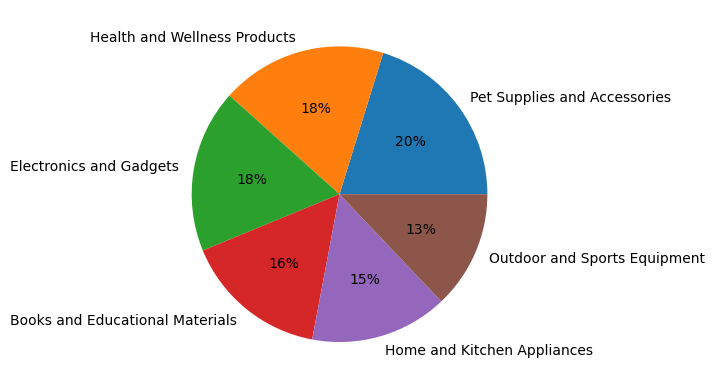

In [116]:
plt.pie(x='TotalPrice',data=category_sales,labels='CategoryName',autopct='%.0f%%')
plt.show()

In [40]:
l = ['hgfhsgdf','bsndfb','hfhds']
list(map(lambda x: len(x),l))

[8, 6, 5]